<a href="https://colab.research.google.com/github/SCS-Technology-and-Innovation/DACS/blob/main/DTDA/epidemic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

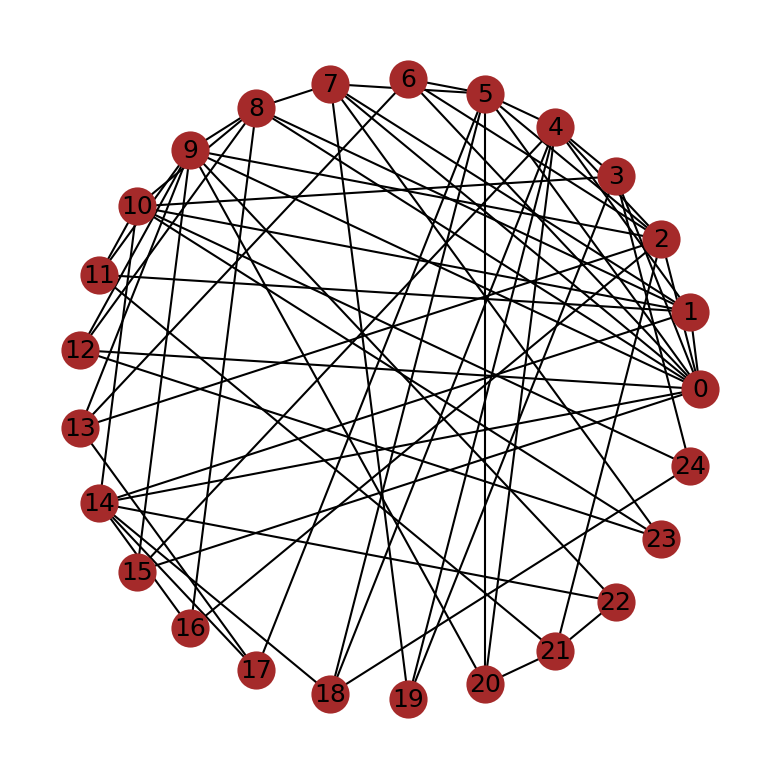

In [31]:
import networkx as nx

n = 25 # how many people (they will arrive one by one)
conn = 3 # how many connections each arriving person forms
G = nx.barabasi_albert_graph(n, conn) 
L = nx.circular_layout(G)

import matplotlib.pyplot as plt
fig = plt.figure(1, figsize = (5, 5), dpi =  150)
S = 'brown'
nx.draw(G, L, node_color = S)
l = nx.draw_networkx_labels(G, pos = L)

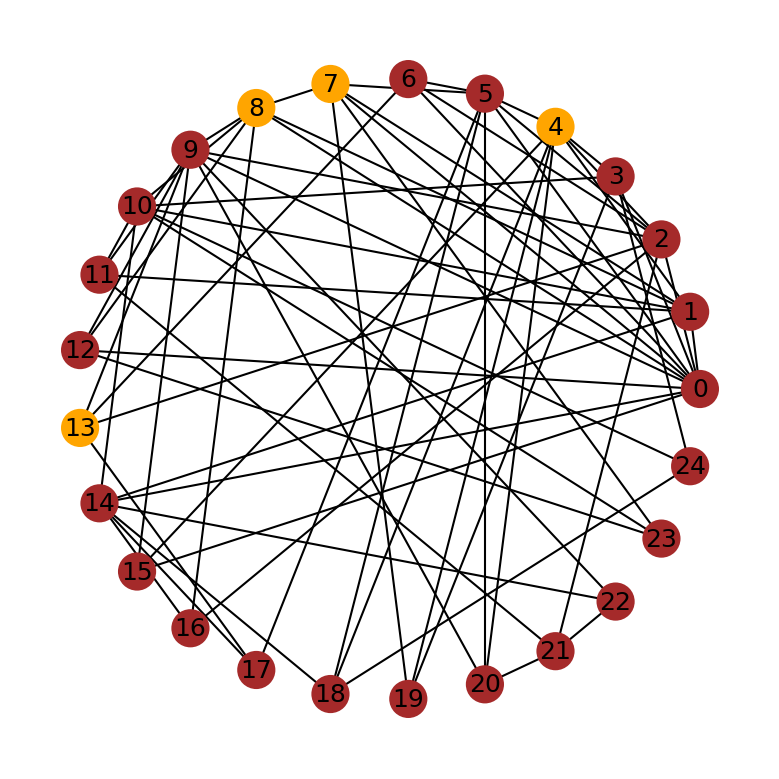

In [32]:
perc = 0.15 # what percentage will be initially infected

from random import sample
infected = set(sample(G.nodes, round(perc * n)))
I = 'orange'

state = [ I if v in infected else S for v in G.nodes ]
fig = plt.figure(1, figsize = (5, 5), dpi =  150)
nx.draw(G, L, node_color = state)
l = nx.draw_networkx_labels(G, pos = L)

In [33]:
contagion = 0.05 # probability of contagion

from random import random

spread = set()
for v in G.nodes:
  for u in G.neighbors(v):
    if random() < contagion:
      spread.add((v, u))
      spread.add((u, v))
      infected.add(u)

spread

{(1, 7),
 (2, 5),
 (2, 13),
 (3, 10),
 (3, 24),
 (5, 2),
 (5, 20),
 (7, 1),
 (7, 8),
 (8, 7),
 (9, 11),
 (10, 3),
 (11, 9),
 (13, 2),
 (20, 5),
 (24, 3)}

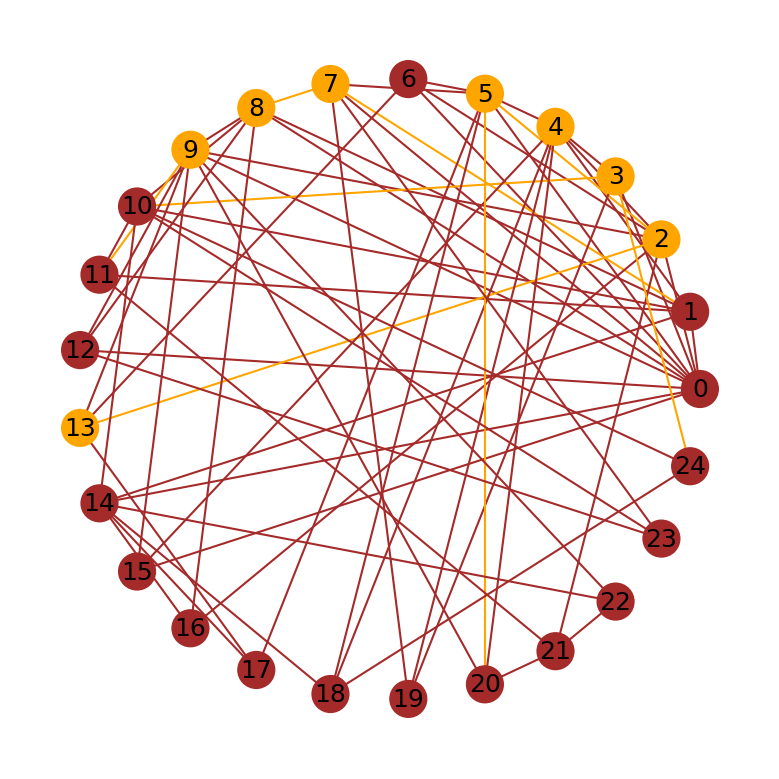

In [34]:
# colors
Vs = [ I if v in infected else S for v in G.nodes ]
Es = [ I if (v, u) in spread else S for v, u in G.edges ]

# drawing
fig = plt.figure(1, figsize = (5, 5), dpi =  150)
nx.draw(G, L, node_color = Vs, edge_color = Es)
l = nx.draw_networkx_labels(G, pos = L)

In [35]:
recovery = 0.5 # probability of recovery

recovered = set()
for v in infected:
  if random() < recovery:
    recovered.add(v)
infected -= recovered

recovered

{7, 8}

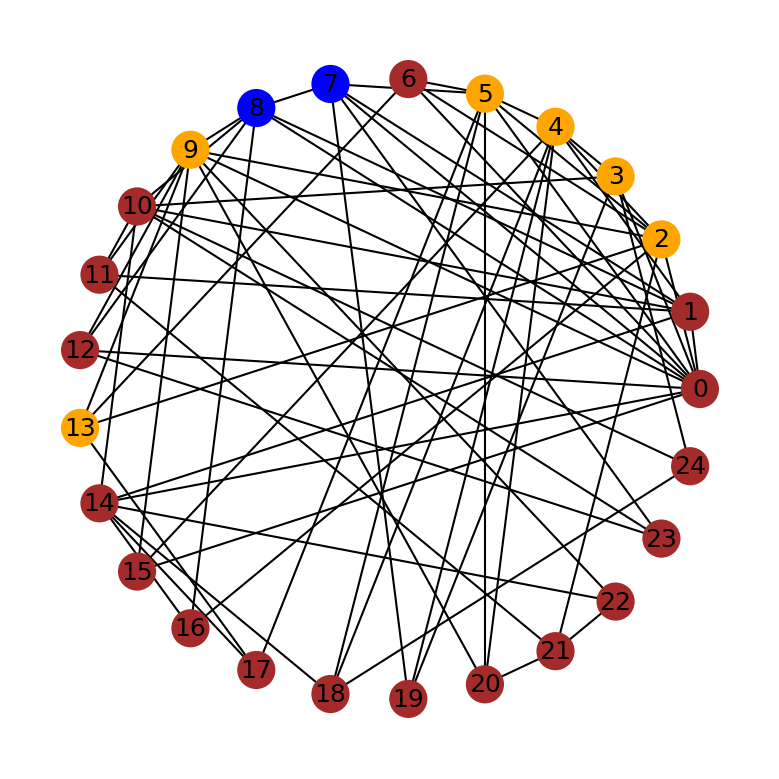

In [36]:
R = 'blue'
Vs = [ I if v in infected else (R if v in recovered else S) for v in G.nodes ]
fig = plt.figure(1, figsize = (5, 5), dpi =  150)
nx.draw(G, L, node_color = Vs)
l = nx.draw_networkx_labels(G, pos = L)

In [37]:
def init(perc = 0.15):
  global infected, recovered 
  infected = set(sample(G.nodes, round(perc * n)))
  recovered = set()

def contagions(contagion = 0.05):
  global infected, spread
  spread = set()
  for v in G.nodes:
   for u in G.neighbors(v):
     if u not in infected and u not in recovered and random() < contagion:
       spread.add((v, u))
       spread.add((u, v))
       infected.add(u)

def recoveries(recovery = 0.5): 
  global infected, recovered
  for v in infected:
   if random() < recovery:
     recovered.add(v)
  infected -= recovered

def visualize():
  Vs = [ I if v in infected else (R if v in recovered else S) for v in G.nodes ]
  Es = [ I if (v, u) in spread else S for v, u in G.edges ]
  nx.draw(G, L, node_color = Vs, edge_color = Es)
  l = nx.draw_networkx_labels(G, pos = L)

def epidemic(t):
  if len(infected) > 0:
    contagions()
    recoveries()
  visualize()

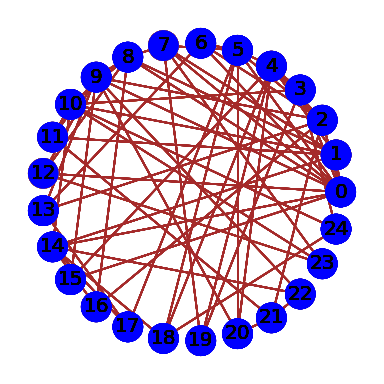

In [38]:
from matplotlib import rc
rc('animation', html='jshtml')
import matplotlib.animation as animation

duration = 10 # how many steps 
init()
fig = plt.figure(figsize = (3, 3), dpi = 120)
plt.clf() 
animation.FuncAnimation(fig, epidemic, frames = duration, repeat = False, init_func = visualize())

In [51]:
timeseries = { 'S' : [], 'I' : [], 'R' : [] }
n = 700 # too big to comfortably visualize
conn = 4
G = nx.barabasi_albert_graph(n, conn) 

init(0.01)
while len(infected) > 0:
    contagions(0.02)
    recoveries(0.05)
    i = len(infected)
    r = len(recovered)
    s = n - (i + r) # the rest
    timeseries['S'].append(s)
    timeseries['I'].append(i)
    timeseries['R'].append(r)

for kind in timeseries:
    print(kind, timeseries[kind][:10]) # just the start

S [601, 522, 451, 396, 347, 294, 261, 233, 204, 189]
I [94, 167, 226, 264, 300, 338, 349, 361, 372, 368]
R [5, 11, 23, 40, 53, 68, 90, 106, 124, 143]


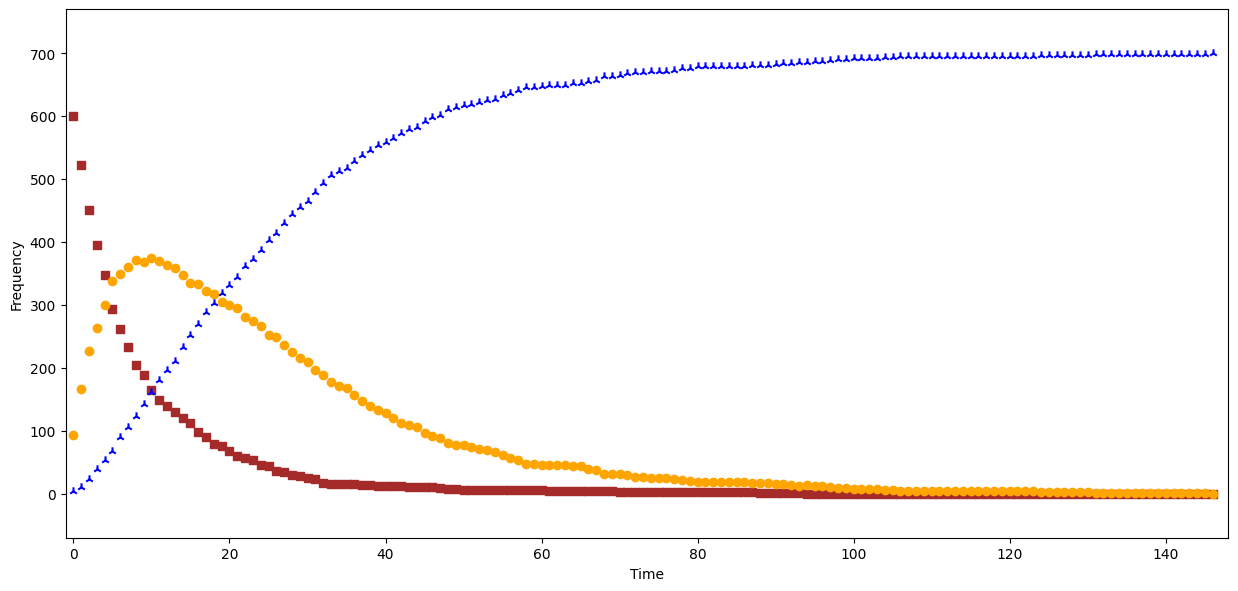

In [53]:
fig = plt.figure(figsize = (15, 7), dpi =  100)
ax = plt.subplot(1, 1, 1)
l = len(timeseries['S'])
plt.xlim(-1, l + 1)
high = max ( [ max(d) for d in timeseries.values() ] )
margin = 0.1 * high
plt.ylim(0 - margin, high + margin)
color = { 'I' : I, 'S' : S, 'R' : R }
marker = { 'I' : 'o', 'S' : 's', 'R' : '2'}
t = [ i for i in range(l) ]
for kind in timeseries:
    ax.scatter(t, timeseries[kind], c = color[kind], marker = marker[kind])
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()